<a href="https://colab.research.google.com/github/nikilstark/Python-assignments/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN using Tensorflow 


In [1]:
!pip install tensorflow-gpu==2.0.0rc0

     |████████████████████████████████| 380.5MB 38kB/s 
     |████████████████████████████████| 501kB 41.7MB/s 
     |████████████████████████████████| 4.3MB 40.6MB/s 


In [2]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [10]:
(train_x,train_y),(test_x,test_y)= cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
class_names = ['airplane', 'automobile' ,'bird' ,'cat','deer' ,'dog' ,'frog', 'horse' ,'ship' ,'truck']

In [13]:
train_x.max()

255

In [0]:
train_x = train_x/255
test_x =test_x/255

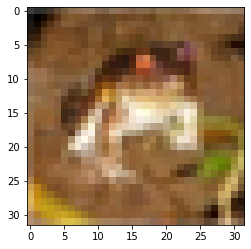

In [16]:
plt.imshow(train_x[0])

# CNN model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [29]:
history =model.fit(train_x,train_y,batch_size=10,epochs=10,verbose=2,validation_data=(test_x,test_y))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 - 207s - loss: 1.3792 - sparse_categorical_accuracy: 0.5049 - val_loss: 1.1257 - val_sparse_categorical_accuracy: 0.6025
Epoch 2/10
50000/50000 - 207s - loss: 1.0830 - sparse_categorical_accuracy: 0.6151 - val_loss: 1.0028 - val_sparse_categorical_accuracy: 0.6513
Epoch 3/10
50000/50000 - 206s - loss: 0.9630 - sparse_categorical_accuracy: 0.6575 - val_loss: 0.9584 - val_sparse_categorical_accuracy: 0.6595
Epoch 4/10
50000/50000 - 206s - loss: 0.8866 - sparse_categorical_accuracy: 0.6855 - val_loss: 0.9392 - val_sparse_categorical_accuracy: 0.6670
Epoch 5/10
50000/50000 - 205s - loss: 0.8195 - sparse_categorical_accuracy: 0.7102 - val_loss: 0.9448 - val_sparse_categorical_accuracy: 0.6727
Epoch 6/10
50000/50000 - 206s - loss: 0.7670 - sparse_categorical_accuracy: 0.7268 - val_loss: 0.9342 - val_sparse_categorical_accuracy: 0.6738
Epoch 7/10
50000/50000 - 206s - loss: 0.7232 - sparse_categorical_accuracy: 0.7427 - v

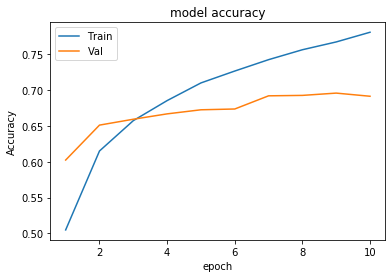

In [30]:
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')

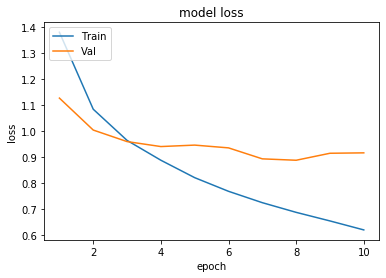

In [31]:
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(test_x)

In [0]:
mat= confusion_matrix(test_y,y_pred)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd75807048>)

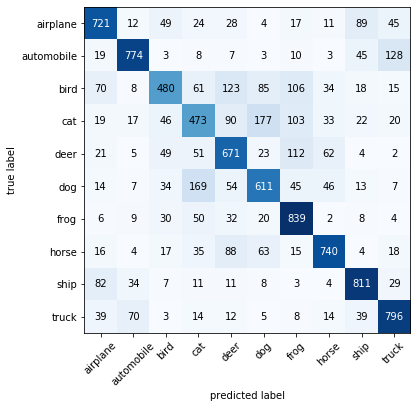

In [35]:
plot_confusion_matrix(mat,figsize=(6,6),class_names=class_names)